In [54]:
# Load data from НБУ

import urllib.request, json 
import pprint


with urllib.request.urlopen("https://bank.gov.ua/NBUStatService/v1/statdirectory/exchange?json") as url:
    data = json.loads(url.read().decode())

pprint.pprint(data)

# save json to file 

with open('data.json', 'w', encoding='windows-1251') as f:
    json.dump(data, f, ensure_ascii=False, indent=4)

[{'cc': 'AUD',
  'exchangedate': '09.05.2022',
  'r030': 36,
  'rate': 20.7403,
  'txt': 'Австралійський долар'},
 {'cc': 'CAD',
  'exchangedate': '09.05.2022',
  'r030': 124,
  'rate': 22.7904,
  'txt': 'Канадський долар'},
 {'cc': 'CNY',
  'exchangedate': '09.05.2022',
  'r030': 156,
  'rate': 4.3853,
  'txt': 'Юань Женьміньбі'},
 {'cc': 'HRK',
  'exchangedate': '09.05.2022',
  'r030': 191,
  'rate': 4.1023,
  'txt': 'Куна'},
 {'cc': 'CZK',
  'exchangedate': '09.05.2022',
  'r030': 203,
  'rate': 1.2537,
  'txt': 'Чеська крона'},
 {'cc': 'DKK',
  'exchangedate': '09.05.2022',
  'r030': 208,
  'rate': 4.1541,
  'txt': 'Данська крона'},
 {'cc': 'HKD',
  'exchangedate': '09.05.2022',
  'r030': 344,
  'rate': 3.7269,
  'txt': 'Гонконгівський долар'},
 {'cc': 'HUF',
  'exchangedate': '09.05.2022',
  'r030': 348,
  'rate': 0.080953,
  'txt': 'Форинт'},
 {'cc': 'INR',
  'exchangedate': '09.05.2022',
  'r030': 356,
  'rate': 0.38047,
  'txt': 'Індійська рупія'},
 {'cc': 'IDR',
  'exchangedat

In [55]:
# json to csv

import pandas as pd
import json


with open('data.json', encoding="windows-1251") as inputfile:
    df = pd.read_json(inputfile)

df.to_csv('NBU_data.csv', encoding="windows-1251", index=False)    


In [78]:
# print csv

import csv
with open('NBU_data.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)

In [83]:
with urllib.request.urlopen('https://bank.gov.ua/NBUStatService/v1/statdirectory/exchange?valcode=EUR&date=20220507&json') as url:
    data = json.loads(url.read().decode())

    for k in data:
        print(k["exchangedate"])

07.05.2022


In [139]:
rates = []
for m in range(1, 6):
    for d in range(1, 32):
        try:
            if d < 10:
                with urllib.request.urlopen(f'https://bank.gov.ua/NBUStatService/v1/statdirectory/exchange?valcode=USD&date=20220{m}0{d}&json') as url:
                    data = json.loads(url.read().decode())

                for k in data:
                    print(f'Date: {k["exchangedate"]} Value: {k["rate"]}')
                    hist_dict = {'date': k["exchangedate"], 'exchange_rate': k["rate"]}
                    rates.append(hist_dict)
            else:
                with urllib.request.urlopen(f'https://bank.gov.ua/NBUStatService/v1/statdirectory/exchange?valcode=USD&date=20220{m}{d}&json') as url:
                    data = json.loads(url.read().decode())

                for k in data:
                    print(f'Date: {k["exchangedate"]} Value: {k["rate"]}')
                    hist_dict = {'date': k["exchangedate"], 'exchange_rate': k["rate"]}
                    rates.append(hist_dict)
        except KeyError:
            print('day missed')

Date: 01.01.2022 Value: 27.2782
Date: 02.01.2022 Value: 27.2782
Date: 03.01.2022 Value: 27.2782
Date: 04.01.2022 Value: 27.2782
Date: 05.01.2022 Value: 27.2976
Date: 06.01.2022 Value: 27.4551
Date: 07.01.2022 Value: 27.4551
Date: 08.01.2022 Value: 27.4551
Date: 09.01.2022 Value: 27.4551
Date: 10.01.2022 Value: 27.4977
Date: 11.01.2022 Value: 27.4998
Date: 12.01.2022 Value: 27.5093
Date: 13.01.2022 Value: 27.7073
Date: 14.01.2022 Value: 27.7372
Date: 15.01.2022 Value: 27.7372
Date: 16.01.2022 Value: 27.7372
Date: 17.01.2022 Value: 27.9514
Date: 18.01.2022 Value: 28.122
Date: 19.01.2022 Value: 28.4101
Date: 20.01.2022 Value: 28.4038
Date: 21.01.2022 Value: 28.3236
Date: 22.01.2022 Value: 28.3236
Date: 23.01.2022 Value: 28.3236
Date: 24.01.2022 Value: 28.3181
Date: 25.01.2022 Value: 28.3749
Date: 26.01.2022 Value: 28.6658
Date: 27.01.2022 Value: 28.7984
Date: 28.01.2022 Value: 28.9879
Date: 29.01.2022 Value: 28.9879
Date: 30.01.2022 Value: 28.9879
Date: 31.01.2022 Value: 28.7839
Date: 01.

In [125]:
print(rates)
# rates.sort(key = lambda x:x['date'])
# for key, value in 

[{'date': '01.01.2022', 'exchange_rate': 30.9226}, {'date': '02.01.2022', 'exchange_rate': 30.9226}, {'date': '03.01.2022', 'exchange_rate': 30.9226}, {'date': '04.01.2022', 'exchange_rate': 30.9226}, {'date': '05.01.2022', 'exchange_rate': 30.7739}, {'date': '06.01.2022', 'exchange_rate': 31.0421}, {'date': '07.01.2022', 'exchange_rate': 31.0421}, {'date': '08.01.2022', 'exchange_rate': 31.0421}, {'date': '09.01.2022', 'exchange_rate': 31.0421}, {'date': '10.01.2022', 'exchange_rate': 31.1095}, {'date': '11.01.2022', 'exchange_rate': 31.116}, {'date': '12.01.2022', 'exchange_rate': 31.1722}, {'date': '13.01.2022', 'exchange_rate': 31.4796}, {'date': '14.01.2022', 'exchange_rate': 31.7813}, {'date': '15.01.2022', 'exchange_rate': 31.7813}, {'date': '16.01.2022', 'exchange_rate': 31.7813}, {'date': '17.01.2022', 'exchange_rate': 31.989}, {'date': '18.01.2022', 'exchange_rate': 32.0577}, {'date': '19.01.2022', 'exchange_rate': 32.3406}, {'date': '20.01.2022', 'exchange_rate': 32.1943}, {

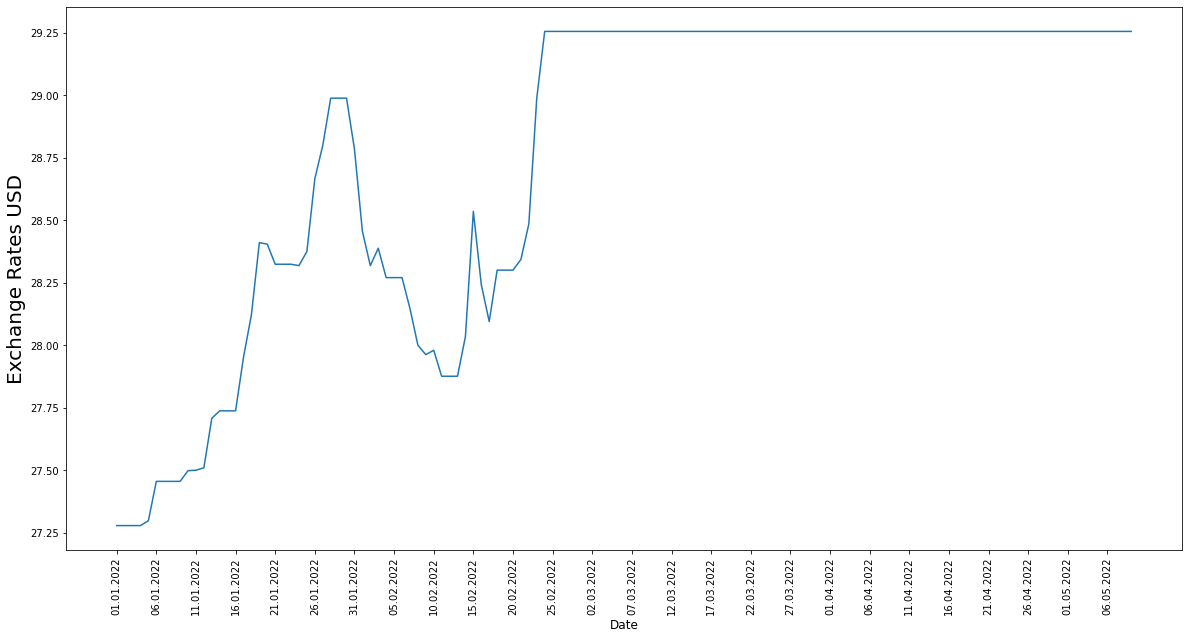

In [141]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.DataFrame(rates)
x = df['date']
y = df['exchange_rate']
fig = plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.xticks(np.arange(0, len(rates), 5))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Exchange Rates USD', fontsize=20)
plt.plot(x,y)